In [3]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [1]:
def k_cluster(input_data , k):
    
    m = input_data.shape[0]                                 ## number of data
    index = random.sample(range(input_data.shape[0]), k)    ## index of random shuffled
    centroid = input_data[index]                            ## initial centroid
    
    def euclidean(a1, a2):                                  ## defining euclidean distance
        distance = np.power(np.sum(np.power(a1-a2,2)),0.5)
        return(distance)
    
    centroid2 = []
    tmp = centroid
    epoch = 1
    
    while(not np.array_equal(tmp,centroid2)):               ## until prev,next centroid are same 

        group_list = {"group_"+str(i):[] for i in range(k)} ## dict for group
        
        print("Training epoch is {}".format(epoch))         ## printing "epoch"
        epoch += 1
        
        for i in range(m):
            dist_list = [euclidean(input_data[i],j) for j in centroid]
            group = dist_list.index(min(dist_list))
            group_list["group_"+str(group)].append(input_data[i])
        
        centroid2 = [np.mean(group_list["group_"+str(j)],axis=0 , keepdims = True) for j in range(k)]
        centroid2 = np.reshape(centroid2,(-1,2))
        tmp = centroid                                      ## old one
        centroid = centroid2                                ## update to new centroid
        
    result = centroid,group_list,index   
    return result

In [4]:
np.random.seed(1234)
input_data = np.random.randn(50,2)

In [5]:
centroid,cluster,index = k_cluster(input_data,2)

Training epoch is 1
Training epoch is 2
Training epoch is 3
Training epoch is 4
Training epoch is 5
Training epoch is 6
Training epoch is 7
Training epoch is 8
Training epoch is 9


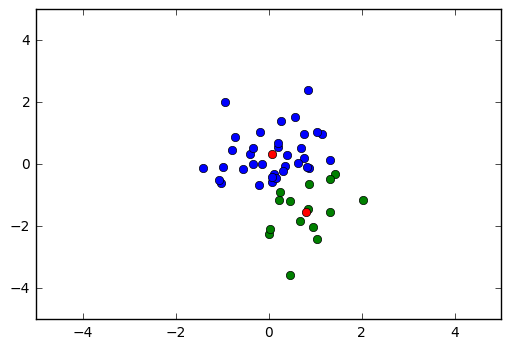

In [6]:
x1 = np.array(cluster['group_0'])[:,0]
y1 = np.array(cluster['group_0'])[:,1]
x2 = np.array(cluster['group_1'])[:,0]
y2 = np.array(cluster['group_1'])[:,1]

plt.plot(x1,y1,"o",color="green")
plt.plot(x2,y2,"o",color="blue")
plt.plot(centroid[:,0],centroid[:,1],"o",color="red")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()